# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

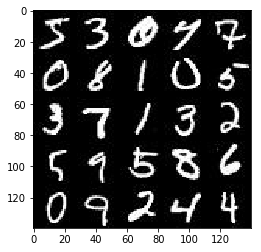

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

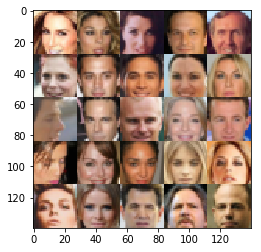

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\dtila\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    #Real input images placeholder
    real_input_images = tf.placeholder(tf.float32, shape=(None,image_width, image_height, image_channels), name='real_input')
    
    #Z input placeholder
    z_input = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    
    #Learning rate placeholder
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return real_input_images, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    alpha=0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):

        cnn_layer_1 = tf.layers.conv2d(images, filters=64, kernel_size=5, strides=2, padding='SAME', kernel_initializer = tf.contrib.layers.xavier_initializer())
        L_relu_1 = tf.maximum(cnn_layer_1*alpha, cnn_layer_1) 

        cnn_layer_2 = tf.layers.conv2d(L_relu_1, filters=128, kernel_size=5, strides=2, padding='SAME', kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn_2 = tf.layers.batch_normalization(cnn_layer_2, training=True)
        L_relu_2 = tf.maximum(bn_2*alpha, bn_2)
        dp_layer_1 = tf.nn.dropout(L_relu_2, keep_prob =0.8) 

        cnn_layer_3 = tf.layers.conv2d(dp_layer_1, filters=256, kernel_size=5, strides=2, padding='SAME', kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn_3 = tf.layers.batch_normalization(cnn_layer_3, training=True)
        L_relu_3 = tf.maximum(bn_3*alpha, bn_3)
        dp_layer_2 = tf.nn.dropout(L_relu_3, keep_prob =0.8)

        flaten_layer = tf.reshape(dp_layer_2, (-1, 4*4*256))
        logits = tf.layers.dense(flaten_layer, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """

    alpha = 0.1
    with tf.variable_scope('generator', reuse=not is_train):       
        
        dense_layer = tf.layers.dense(inputs=z, units=4*4*1024,kernel_initializer=tf.contrib.layers.xavier_initializer())
        depth_increased_layer = tf.reshape(dense_layer, (-1, 4, 4, 1024))
        bn_1 = tf.layers.batch_normalization(depth_increased_layer, training=is_train)
        rel_1 = tf.maximum(bn_1*alpha, bn_1)
        dp_layer_1 = tf.nn.dropout(rel_1, keep_prob =0.8) 

        decon_layer_1 = tf.layers.conv2d_transpose(dp_layer_1, 512, 5, 3, 'valid',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn_2 = tf.layers.batch_normalization(decon_layer_1, training=is_train)
        rel_2 = tf.maximum(bn_2*alpha, bn_2)
        dp_layer_2 = tf.nn.dropout(rel_2, keep_prob =0.8) 
    
        decon_layer_2 = tf.layers.conv2d_transpose(dp_layer_2, 256, 5, 2, 'same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn_3 = tf.layers.batch_normalization(decon_layer_2, training=is_train)
        rel_3 = tf.maximum(bn_3*alpha, bn_3)
        dp_layer_3 = tf.nn.dropout(rel_3, keep_prob =0.8)
        
        decon_layer_3 = tf.layers.conv2d_transpose(dp_layer_3, 128, 5, 1, 'same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn_4 = tf.layers.batch_normalization(decon_layer_3, training=is_train)
        rel_4 = tf.maximum(bn_4*alpha, bn_4)
        dp_layer_4 = tf.nn.dropout(rel_4, keep_prob =0.8)  

        logits = tf.layers.conv2d_transpose(dp_layer_4, out_channel_dim, 5, 1, 'same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        output = tf.tanh(logits)
    
        return output



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function 
    
    #Generator
    g_model = generator(input_z, out_channel_dim, True)
    
    #Real image
    d_model_real, d_logits_real = discriminator(input_real)
    
    #Fake image
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    #Discriminator loss - Real Images
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                         labels=tf.ones_like(d_model_real)*0.9)) 
    #Discriminator loss - Fake Images
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                         labels=tf.zeros_like(d_model_fake)))
    #Generator loss - Fake Images
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                     labels=tf.ones_like(d_model_fake)))
    #Total discriminatorloss
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [20]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    g_vars = [var for var in tf.trainable_variables() if var.name.startswith('generator')]
    d_vars = [var for var in tf.trainable_variables() if var.name.startswith('discriminator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_loss_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_loss_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_loss_opt,  g_loss_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [48]:
import matplotlib.pyplot as plt
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    #Input images
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim) #width, height and channels(depth)
    
    #Discriminator and generator loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    #Discriminator and generator optimizer
    d_loss_opt,  g_loss_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_loss_count = 30
    show_output_count = 500
    n_images = 30
    d_loss_vec = []
    g_loss_vec = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=[batch_size, z_dim])
                # Train
                d,_ = sess.run([d_loss, d_loss_opt], feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                g,_ = sess.run([g_loss, g_loss_opt], feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                g,_ = sess.run([g_loss, g_loss_opt], feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                d_loss_vec.append(d)
                g_loss_vec.append(g)
                
                # Printing
                if steps % print_loss_count == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{};".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f};".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_output_count == 0:
                    show_generator_output(sess, n_images, input_z, data_shape[3], data_image_mode)        
                
    Discriminator_loss, = plt.plot(d_loss_vec, color='b', label='Discriminator loss')
    Genereator_loss, = plt.plot(g_loss_vec, color='r', label='Generator loss')
    plt.legend(handles=[Discriminator_loss, Genereator_loss])

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2; Discriminator Loss: 2.2532; Generator Loss: 0.3070
Epoch 1/2; Discriminator Loss: 1.9109; Generator Loss: 0.4280
Epoch 1/2; Discriminator Loss: 1.6784; Generator Loss: 0.4731
Epoch 1/2; Discriminator Loss: 1.6264; Generator Loss: 0.6841
Epoch 1/2; Discriminator Loss: 1.5742; Generator Loss: 0.5100
Epoch 1/2; Discriminator Loss: 1.5859; Generator Loss: 0.7527
Epoch 1/2; Discriminator Loss: 1.7293; Generator Loss: 0.6742
Epoch 1/2; Discriminator Loss: 1.4767; Generator Loss: 0.7355
Epoch 1/2; Discriminator Loss: 1.4763; Generator Loss: 0.5560
Epoch 1/2; Discriminator Loss: 1.6456; Generator Loss: 0.4751
Epoch 1/2; Discriminator Loss: 1.7155; Generator Loss: 0.4701
Epoch 1/2; Discriminator Loss: 1.6803; Generator Loss: 0.6834
Epoch 1/2; Discriminator Loss: 1.6267; Generator Loss: 0.5719
Epoch 1/2; Discriminator Loss: 1.4223; Generator Loss: 0.7207
Epoch 1/2; Discriminator Loss: 1.4982; Generator Loss: 0.7767
Epoch 1/2; Discriminator Loss: 1.4903; Generator Loss: 0.6116


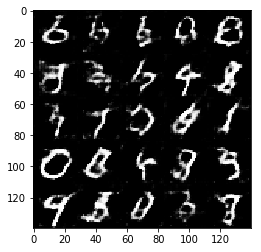

Epoch 1/2; Discriminator Loss: 1.5786; Generator Loss: 0.6976
Epoch 1/2; Discriminator Loss: 1.6977; Generator Loss: 0.4529
Epoch 1/2; Discriminator Loss: 1.6109; Generator Loss: 0.4517
Epoch 1/2; Discriminator Loss: 1.7227; Generator Loss: 0.4388
Epoch 1/2; Discriminator Loss: 1.4423; Generator Loss: 0.6905
Epoch 1/2; Discriminator Loss: 1.4122; Generator Loss: 0.9113
Epoch 1/2; Discriminator Loss: 1.5939; Generator Loss: 0.5580
Epoch 1/2; Discriminator Loss: 1.5154; Generator Loss: 0.6870
Epoch 1/2; Discriminator Loss: 1.4296; Generator Loss: 0.6940
Epoch 1/2; Discriminator Loss: 1.6939; Generator Loss: 1.0533
Epoch 1/2; Discriminator Loss: 1.3093; Generator Loss: 0.7778
Epoch 1/2; Discriminator Loss: 1.3250; Generator Loss: 1.0770
Epoch 1/2; Discriminator Loss: 1.6123; Generator Loss: 0.6401
Epoch 1/2; Discriminator Loss: 1.6074; Generator Loss: 0.4902
Epoch 1/2; Discriminator Loss: 1.4677; Generator Loss: 0.5828
Epoch 1/2; Discriminator Loss: 1.4637; Generator Loss: 0.6377
Epoch 1/

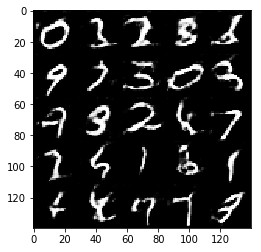

Epoch 1/2; Discriminator Loss: 1.3301; Generator Loss: 0.7013
Epoch 1/2; Discriminator Loss: 1.4688; Generator Loss: 0.5314
Epoch 1/2; Discriminator Loss: 1.6954; Generator Loss: 0.5190
Epoch 1/2; Discriminator Loss: 1.5417; Generator Loss: 1.2571
Epoch 1/2; Discriminator Loss: 1.5012; Generator Loss: 0.7092
Epoch 1/2; Discriminator Loss: 1.4450; Generator Loss: 0.7571
Epoch 1/2; Discriminator Loss: 1.1840; Generator Loss: 0.9617
Epoch 1/2; Discriminator Loss: 1.4116; Generator Loss: 0.7421
Epoch 1/2; Discriminator Loss: 1.5708; Generator Loss: 0.5129
Epoch 1/2; Discriminator Loss: 1.6328; Generator Loss: 0.4343
Epoch 1/2; Discriminator Loss: 1.6028; Generator Loss: 0.4751
Epoch 1/2; Discriminator Loss: 1.5236; Generator Loss: 0.5647
Epoch 1/2; Discriminator Loss: 1.5318; Generator Loss: 0.5311
Epoch 1/2; Discriminator Loss: 1.5069; Generator Loss: 0.7439
Epoch 1/2; Discriminator Loss: 1.3742; Generator Loss: 0.8562
Epoch 1/2; Discriminator Loss: 1.4840; Generator Loss: 0.4671
Epoch 1/

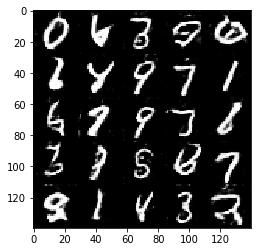

Epoch 1/2; Discriminator Loss: 1.5834; Generator Loss: 0.5870
Epoch 1/2; Discriminator Loss: 1.5179; Generator Loss: 0.5625
Epoch 1/2; Discriminator Loss: 1.3805; Generator Loss: 0.6033
Epoch 1/2; Discriminator Loss: 1.4359; Generator Loss: 0.6165
Epoch 1/2; Discriminator Loss: 1.3788; Generator Loss: 0.7694
Epoch 1/2; Discriminator Loss: 1.3023; Generator Loss: 0.8137
Epoch 1/2; Discriminator Loss: 1.4666; Generator Loss: 0.9707
Epoch 1/2; Discriminator Loss: 1.2905; Generator Loss: 0.8178
Epoch 1/2; Discriminator Loss: 1.3824; Generator Loss: 0.8172
Epoch 1/2; Discriminator Loss: 1.1720; Generator Loss: 0.8664
Epoch 1/2; Discriminator Loss: 1.5111; Generator Loss: 0.5901
Epoch 1/2; Discriminator Loss: 1.5644; Generator Loss: 0.5518
Epoch 2/2; Discriminator Loss: 1.2393; Generator Loss: 0.8721
Epoch 2/2; Discriminator Loss: 1.3878; Generator Loss: 0.7395
Epoch 2/2; Discriminator Loss: 1.2926; Generator Loss: 0.7476
Epoch 2/2; Discriminator Loss: 1.4950; Generator Loss: 0.7234


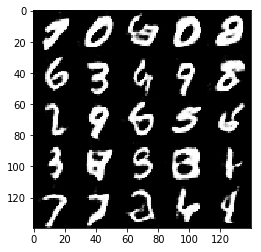

Epoch 2/2; Discriminator Loss: 1.5447; Generator Loss: 0.7464
Epoch 2/2; Discriminator Loss: 1.2277; Generator Loss: 0.7863
Epoch 2/2; Discriminator Loss: 1.2298; Generator Loss: 1.1866
Epoch 2/2; Discriminator Loss: 1.4063; Generator Loss: 0.9679
Epoch 2/2; Discriminator Loss: 1.3132; Generator Loss: 0.9444
Epoch 2/2; Discriminator Loss: 1.2967; Generator Loss: 0.8800
Epoch 2/2; Discriminator Loss: 1.2895; Generator Loss: 0.6949
Epoch 2/2; Discriminator Loss: 1.2820; Generator Loss: 0.9379
Epoch 2/2; Discriminator Loss: 1.3386; Generator Loss: 0.8816
Epoch 2/2; Discriminator Loss: 1.6271; Generator Loss: 0.4917
Epoch 2/2; Discriminator Loss: 1.6978; Generator Loss: 0.9188
Epoch 2/2; Discriminator Loss: 1.2669; Generator Loss: 0.9588
Epoch 2/2; Discriminator Loss: 1.4050; Generator Loss: 0.9234
Epoch 2/2; Discriminator Loss: 1.2975; Generator Loss: 1.0643
Epoch 2/2; Discriminator Loss: 1.4351; Generator Loss: 1.1814
Epoch 2/2; Discriminator Loss: 1.5098; Generator Loss: 1.3962
Epoch 2/

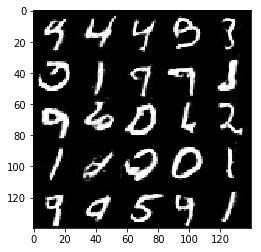

Epoch 2/2; Discriminator Loss: 1.1341; Generator Loss: 1.0412
Epoch 2/2; Discriminator Loss: 1.2490; Generator Loss: 0.9028
Epoch 2/2; Discriminator Loss: 1.3549; Generator Loss: 1.5381
Epoch 2/2; Discriminator Loss: 1.2383; Generator Loss: 0.6626
Epoch 2/2; Discriminator Loss: 1.4474; Generator Loss: 0.7130
Epoch 2/2; Discriminator Loss: 1.3706; Generator Loss: 0.7175
Epoch 2/2; Discriminator Loss: 1.8732; Generator Loss: 0.3921
Epoch 2/2; Discriminator Loss: 1.4003; Generator Loss: 0.8865
Epoch 2/2; Discriminator Loss: 1.3365; Generator Loss: 0.7329
Epoch 2/2; Discriminator Loss: 1.8404; Generator Loss: 0.4180
Epoch 2/2; Discriminator Loss: 1.3089; Generator Loss: 0.9518
Epoch 2/2; Discriminator Loss: 1.3818; Generator Loss: 0.6129
Epoch 2/2; Discriminator Loss: 1.2640; Generator Loss: 1.1764
Epoch 2/2; Discriminator Loss: 1.3926; Generator Loss: 0.8194
Epoch 2/2; Discriminator Loss: 1.3077; Generator Loss: 0.6365
Epoch 2/2; Discriminator Loss: 1.2451; Generator Loss: 1.0952
Epoch 2/

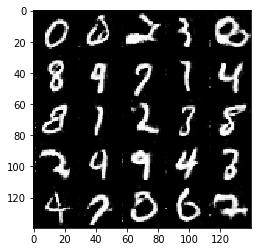

Epoch 2/2; Discriminator Loss: 1.3494; Generator Loss: 0.8649
Epoch 2/2; Discriminator Loss: 1.1094; Generator Loss: 1.2000
Epoch 2/2; Discriminator Loss: 1.5042; Generator Loss: 0.5717
Epoch 2/2; Discriminator Loss: 1.3816; Generator Loss: 0.7061
Epoch 2/2; Discriminator Loss: 1.1057; Generator Loss: 0.8920
Epoch 2/2; Discriminator Loss: 1.2564; Generator Loss: 0.9738
Epoch 2/2; Discriminator Loss: 1.1898; Generator Loss: 1.2318
Epoch 2/2; Discriminator Loss: 1.2636; Generator Loss: 1.0868
Epoch 2/2; Discriminator Loss: 1.2861; Generator Loss: 0.8256
Epoch 2/2; Discriminator Loss: 1.1635; Generator Loss: 0.7675
Epoch 2/2; Discriminator Loss: 1.2396; Generator Loss: 1.1578
Epoch 2/2; Discriminator Loss: 1.0773; Generator Loss: 1.1722
Epoch 2/2; Discriminator Loss: 1.2933; Generator Loss: 1.0231
Epoch 2/2; Discriminator Loss: 1.0879; Generator Loss: 0.9770
Epoch 2/2; Discriminator Loss: 1.4999; Generator Loss: 0.5151
Epoch 2/2; Discriminator Loss: 1.1784; Generator Loss: 0.6787


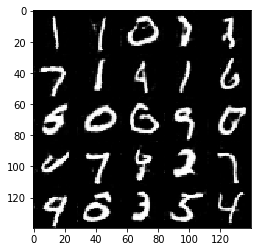

Epoch 2/2; Discriminator Loss: 1.1073; Generator Loss: 1.2847
Epoch 2/2; Discriminator Loss: 0.9742; Generator Loss: 1.0045
Epoch 2/2; Discriminator Loss: 1.1869; Generator Loss: 0.8579
Epoch 2/2; Discriminator Loss: 0.9783; Generator Loss: 1.2004
Epoch 2/2; Discriminator Loss: 1.1830; Generator Loss: 0.9254
Epoch 2/2; Discriminator Loss: 1.6193; Generator Loss: 0.5879
Epoch 2/2; Discriminator Loss: 1.2150; Generator Loss: 0.9766
Epoch 2/2; Discriminator Loss: 1.3696; Generator Loss: 0.7041
Epoch 2/2; Discriminator Loss: 1.2667; Generator Loss: 1.2396


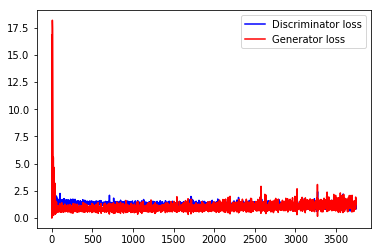

In [49]:
batch_size = 32
z_dim = 175
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/2; Discriminator Loss: 2.7976; Generator Loss: 0.2020
Epoch 1/2; Discriminator Loss: 2.3152; Generator Loss: 0.6542
Epoch 1/2; Discriminator Loss: 1.9071; Generator Loss: 0.5925
Epoch 1/2; Discriminator Loss: 1.8590; Generator Loss: 0.3573
Epoch 1/2; Discriminator Loss: 1.9522; Generator Loss: 0.6056
Epoch 1/2; Discriminator Loss: 1.6007; Generator Loss: 0.5762
Epoch 1/2; Discriminator Loss: 1.5293; Generator Loss: 0.4970
Epoch 1/2; Discriminator Loss: 1.6876; Generator Loss: 0.8638
Epoch 1/2; Discriminator Loss: 1.7055; Generator Loss: 0.4265
Epoch 1/2; Discriminator Loss: 1.6194; Generator Loss: 0.8895
Epoch 1/2; Discriminator Loss: 1.6156; Generator Loss: 0.6794
Epoch 1/2; Discriminator Loss: 1.4374; Generator Loss: 0.5304
Epoch 1/2; Discriminator Loss: 1.6585; Generator Loss: 0.7858
Epoch 1/2; Discriminator Loss: 1.5177; Generator Loss: 0.8513
Epoch 1/2; Discriminator Loss: 1.6994; Generator Loss: 0.5568
Epoch 1/2; Discriminator Loss: 1.5432; Generator Loss: 0.7457


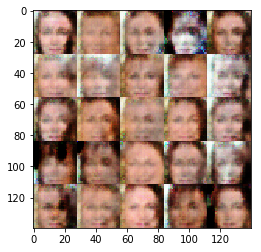

Epoch 1/2; Discriminator Loss: 1.3766; Generator Loss: 0.8283
Epoch 1/2; Discriminator Loss: 1.4653; Generator Loss: 0.6614
Epoch 1/2; Discriminator Loss: 1.5428; Generator Loss: 0.7369
Epoch 1/2; Discriminator Loss: 1.4612; Generator Loss: 0.8222
Epoch 1/2; Discriminator Loss: 1.4048; Generator Loss: 0.6931
Epoch 1/2; Discriminator Loss: 1.5450; Generator Loss: 0.8622
Epoch 1/2; Discriminator Loss: 1.6674; Generator Loss: 0.8642
Epoch 1/2; Discriminator Loss: 1.3871; Generator Loss: 0.7942
Epoch 1/2; Discriminator Loss: 1.4467; Generator Loss: 0.7980
Epoch 1/2; Discriminator Loss: 1.5213; Generator Loss: 0.6638
Epoch 1/2; Discriminator Loss: 1.3651; Generator Loss: 0.8892
Epoch 1/2; Discriminator Loss: 1.6516; Generator Loss: 0.9103
Epoch 1/2; Discriminator Loss: 1.7438; Generator Loss: 0.5472
Epoch 1/2; Discriminator Loss: 1.4748; Generator Loss: 0.7742
Epoch 1/2; Discriminator Loss: 1.4417; Generator Loss: 0.6466
Epoch 1/2; Discriminator Loss: 1.5141; Generator Loss: 0.6452
Epoch 1/

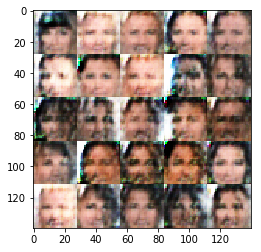

Epoch 1/2; Discriminator Loss: 1.5216; Generator Loss: 0.5364
Epoch 1/2; Discriminator Loss: 1.4325; Generator Loss: 0.7472
Epoch 1/2; Discriminator Loss: 1.4605; Generator Loss: 0.6218
Epoch 1/2; Discriminator Loss: 1.4004; Generator Loss: 0.6657
Epoch 1/2; Discriminator Loss: 1.4819; Generator Loss: 0.6982
Epoch 1/2; Discriminator Loss: 1.4791; Generator Loss: 0.7678
Epoch 1/2; Discriminator Loss: 1.5042; Generator Loss: 0.7115
Epoch 1/2; Discriminator Loss: 1.4909; Generator Loss: 0.6026
Epoch 1/2; Discriminator Loss: 1.5636; Generator Loss: 0.6882
Epoch 1/2; Discriminator Loss: 1.5518; Generator Loss: 0.7169
Epoch 1/2; Discriminator Loss: 1.4635; Generator Loss: 0.9212
Epoch 1/2; Discriminator Loss: 1.4109; Generator Loss: 0.6317
Epoch 1/2; Discriminator Loss: 1.5162; Generator Loss: 0.8373
Epoch 1/2; Discriminator Loss: 1.3992; Generator Loss: 0.7393
Epoch 1/2; Discriminator Loss: 1.4583; Generator Loss: 0.6856
Epoch 1/2; Discriminator Loss: 1.4541; Generator Loss: 0.7174
Epoch 1/

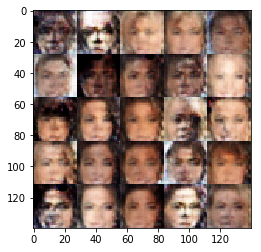

Epoch 1/2; Discriminator Loss: 1.4921; Generator Loss: 0.6705
Epoch 1/2; Discriminator Loss: 1.4667; Generator Loss: 0.6418
Epoch 1/2; Discriminator Loss: 1.4195; Generator Loss: 0.8529
Epoch 1/2; Discriminator Loss: 1.4452; Generator Loss: 0.7001
Epoch 1/2; Discriminator Loss: 1.4791; Generator Loss: 0.6720
Epoch 1/2; Discriminator Loss: 1.3554; Generator Loss: 0.6818
Epoch 1/2; Discriminator Loss: 1.4849; Generator Loss: 0.7950
Epoch 1/2; Discriminator Loss: 1.4571; Generator Loss: 0.7730
Epoch 1/2; Discriminator Loss: 1.4906; Generator Loss: 0.9078
Epoch 1/2; Discriminator Loss: 1.4889; Generator Loss: 0.7870
Epoch 1/2; Discriminator Loss: 1.4435; Generator Loss: 0.8452
Epoch 1/2; Discriminator Loss: 1.4484; Generator Loss: 0.7339
Epoch 1/2; Discriminator Loss: 1.4590; Generator Loss: 0.6181
Epoch 1/2; Discriminator Loss: 1.4616; Generator Loss: 0.6730
Epoch 1/2; Discriminator Loss: 1.4540; Generator Loss: 0.6989
Epoch 1/2; Discriminator Loss: 1.4582; Generator Loss: 0.7290


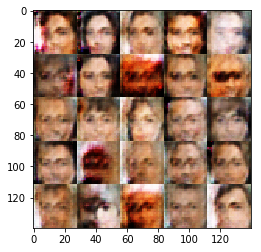

Epoch 1/2; Discriminator Loss: 1.4094; Generator Loss: 0.6767
Epoch 1/2; Discriminator Loss: 1.4144; Generator Loss: 0.6410
Epoch 1/2; Discriminator Loss: 1.4305; Generator Loss: 0.7826
Epoch 1/2; Discriminator Loss: 1.4191; Generator Loss: 0.7515
Epoch 1/2; Discriminator Loss: 1.4138; Generator Loss: 0.7414
Epoch 1/2; Discriminator Loss: 1.4514; Generator Loss: 0.7013
Epoch 1/2; Discriminator Loss: 1.4583; Generator Loss: 0.7966
Epoch 1/2; Discriminator Loss: 1.4971; Generator Loss: 0.8139
Epoch 1/2; Discriminator Loss: 1.5045; Generator Loss: 0.6228
Epoch 1/2; Discriminator Loss: 1.4006; Generator Loss: 0.7736
Epoch 1/2; Discriminator Loss: 1.4659; Generator Loss: 0.8263
Epoch 1/2; Discriminator Loss: 1.4436; Generator Loss: 0.7209
Epoch 1/2; Discriminator Loss: 1.4368; Generator Loss: 0.6946
Epoch 1/2; Discriminator Loss: 1.3823; Generator Loss: 0.7326
Epoch 1/2; Discriminator Loss: 1.4100; Generator Loss: 0.7987
Epoch 1/2; Discriminator Loss: 1.4354; Generator Loss: 0.7442
Epoch 1/

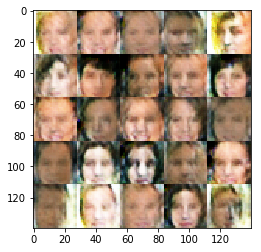

Epoch 1/2; Discriminator Loss: 1.4011; Generator Loss: 0.7965
Epoch 1/2; Discriminator Loss: 1.4403; Generator Loss: 0.8679
Epoch 1/2; Discriminator Loss: 1.3753; Generator Loss: 0.7618
Epoch 1/2; Discriminator Loss: 1.4412; Generator Loss: 0.9286
Epoch 1/2; Discriminator Loss: 1.4005; Generator Loss: 0.7743
Epoch 1/2; Discriminator Loss: 1.4375; Generator Loss: 0.7094
Epoch 1/2; Discriminator Loss: 1.4054; Generator Loss: 0.7765
Epoch 1/2; Discriminator Loss: 1.4205; Generator Loss: 0.6893
Epoch 1/2; Discriminator Loss: 1.4546; Generator Loss: 0.6594
Epoch 1/2; Discriminator Loss: 1.3909; Generator Loss: 0.7847
Epoch 1/2; Discriminator Loss: 1.4467; Generator Loss: 0.7348
Epoch 1/2; Discriminator Loss: 1.5034; Generator Loss: 0.7524
Epoch 1/2; Discriminator Loss: 1.4173; Generator Loss: 0.7740
Epoch 1/2; Discriminator Loss: 1.4074; Generator Loss: 0.8153
Epoch 1/2; Discriminator Loss: 1.4334; Generator Loss: 0.7218
Epoch 1/2; Discriminator Loss: 1.4171; Generator Loss: 0.7456
Epoch 1/

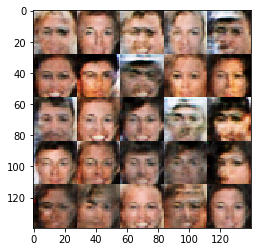

Epoch 1/2; Discriminator Loss: 1.4320; Generator Loss: 0.9265
Epoch 1/2; Discriminator Loss: 1.4389; Generator Loss: 0.8802
Epoch 1/2; Discriminator Loss: 1.4043; Generator Loss: 0.6649
Epoch 1/2; Discriminator Loss: 1.4130; Generator Loss: 0.8242
Epoch 1/2; Discriminator Loss: 1.4060; Generator Loss: 0.6701
Epoch 1/2; Discriminator Loss: 1.4186; Generator Loss: 0.8084
Epoch 1/2; Discriminator Loss: 1.4579; Generator Loss: 0.6758
Epoch 1/2; Discriminator Loss: 1.4136; Generator Loss: 0.7136
Epoch 1/2; Discriminator Loss: 1.4249; Generator Loss: 0.8812
Epoch 1/2; Discriminator Loss: 1.4208; Generator Loss: 0.7655
Epoch 1/2; Discriminator Loss: 1.4412; Generator Loss: 0.7435
Epoch 1/2; Discriminator Loss: 1.3814; Generator Loss: 0.7357
Epoch 1/2; Discriminator Loss: 1.4366; Generator Loss: 0.7170
Epoch 1/2; Discriminator Loss: 1.3918; Generator Loss: 0.7453
Epoch 1/2; Discriminator Loss: 1.4180; Generator Loss: 0.7800
Epoch 1/2; Discriminator Loss: 1.4285; Generator Loss: 0.6957


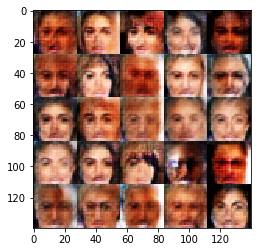

Epoch 1/2; Discriminator Loss: 1.4237; Generator Loss: 0.8482
Epoch 1/2; Discriminator Loss: 1.3730; Generator Loss: 0.8387
Epoch 1/2; Discriminator Loss: 1.4131; Generator Loss: 0.7379
Epoch 1/2; Discriminator Loss: 1.4269; Generator Loss: 0.6526
Epoch 1/2; Discriminator Loss: 1.4651; Generator Loss: 0.7959
Epoch 1/2; Discriminator Loss: 1.3948; Generator Loss: 0.7598
Epoch 1/2; Discriminator Loss: 1.4014; Generator Loss: 0.7893
Epoch 1/2; Discriminator Loss: 1.4078; Generator Loss: 0.8371
Epoch 1/2; Discriminator Loss: 1.3748; Generator Loss: 0.7578
Epoch 1/2; Discriminator Loss: 1.3940; Generator Loss: 0.8092
Epoch 1/2; Discriminator Loss: 1.4239; Generator Loss: 0.7427
Epoch 1/2; Discriminator Loss: 1.3925; Generator Loss: 0.7889
Epoch 1/2; Discriminator Loss: 1.4448; Generator Loss: 0.8138
Epoch 1/2; Discriminator Loss: 1.4036; Generator Loss: 0.7356
Epoch 1/2; Discriminator Loss: 1.3970; Generator Loss: 0.7221
Epoch 1/2; Discriminator Loss: 1.4150; Generator Loss: 0.8057
Epoch 1/

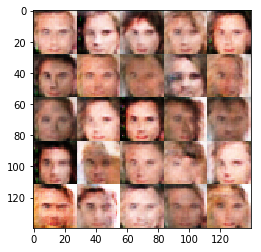

Epoch 1/2; Discriminator Loss: 1.3614; Generator Loss: 0.8049
Epoch 1/2; Discriminator Loss: 1.4005; Generator Loss: 0.7699
Epoch 1/2; Discriminator Loss: 1.4239; Generator Loss: 0.7284
Epoch 1/2; Discriminator Loss: 1.3781; Generator Loss: 0.7436
Epoch 1/2; Discriminator Loss: 1.4095; Generator Loss: 0.6302
Epoch 1/2; Discriminator Loss: 1.3677; Generator Loss: 0.7435
Epoch 1/2; Discriminator Loss: 1.3935; Generator Loss: 0.8268
Epoch 1/2; Discriminator Loss: 1.4156; Generator Loss: 0.7498
Epoch 1/2; Discriminator Loss: 1.4162; Generator Loss: 0.7361
Epoch 1/2; Discriminator Loss: 1.3995; Generator Loss: 0.8000
Epoch 1/2; Discriminator Loss: 1.2869; Generator Loss: 0.8108
Epoch 1/2; Discriminator Loss: 1.4135; Generator Loss: 0.8436
Epoch 1/2; Discriminator Loss: 1.3812; Generator Loss: 0.7053
Epoch 1/2; Discriminator Loss: 1.3840; Generator Loss: 0.7264
Epoch 1/2; Discriminator Loss: 1.4175; Generator Loss: 0.6864
Epoch 1/2; Discriminator Loss: 1.4056; Generator Loss: 0.8495
Epoch 1/

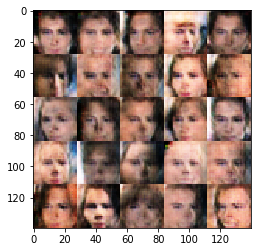

Epoch 1/2; Discriminator Loss: 1.3686; Generator Loss: 0.7212
Epoch 1/2; Discriminator Loss: 1.3961; Generator Loss: 0.7915
Epoch 1/2; Discriminator Loss: 1.3838; Generator Loss: 0.8149
Epoch 1/2; Discriminator Loss: 1.4075; Generator Loss: 0.7448
Epoch 1/2; Discriminator Loss: 1.3952; Generator Loss: 0.6775
Epoch 1/2; Discriminator Loss: 1.4170; Generator Loss: 0.7133
Epoch 1/2; Discriminator Loss: 1.3679; Generator Loss: 0.7891
Epoch 1/2; Discriminator Loss: 1.3593; Generator Loss: 0.7706
Epoch 1/2; Discriminator Loss: 1.4005; Generator Loss: 0.7309
Epoch 1/2; Discriminator Loss: 1.3879; Generator Loss: 0.8353
Epoch 1/2; Discriminator Loss: 1.4876; Generator Loss: 0.6508
Epoch 1/2; Discriminator Loss: 1.4080; Generator Loss: 0.7689
Epoch 1/2; Discriminator Loss: 1.4197; Generator Loss: 0.6958
Epoch 1/2; Discriminator Loss: 1.4499; Generator Loss: 0.7159
Epoch 1/2; Discriminator Loss: 1.3702; Generator Loss: 0.6700
Epoch 1/2; Discriminator Loss: 1.3025; Generator Loss: 0.9106


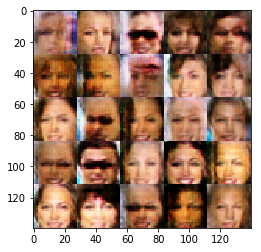

Epoch 1/2; Discriminator Loss: 1.4039; Generator Loss: 0.8389
Epoch 1/2; Discriminator Loss: 1.4458; Generator Loss: 0.6693
Epoch 1/2; Discriminator Loss: 1.3536; Generator Loss: 0.8412
Epoch 1/2; Discriminator Loss: 1.4451; Generator Loss: 0.7570
Epoch 1/2; Discriminator Loss: 1.4072; Generator Loss: 0.7220
Epoch 1/2; Discriminator Loss: 1.3734; Generator Loss: 0.7653
Epoch 1/2; Discriminator Loss: 1.4087; Generator Loss: 0.7608
Epoch 1/2; Discriminator Loss: 1.3621; Generator Loss: 0.8232
Epoch 1/2; Discriminator Loss: 1.3832; Generator Loss: 0.8148
Epoch 1/2; Discriminator Loss: 1.3815; Generator Loss: 0.7623
Epoch 1/2; Discriminator Loss: 1.3931; Generator Loss: 0.7614
Epoch 1/2; Discriminator Loss: 1.4731; Generator Loss: 0.6424
Epoch 1/2; Discriminator Loss: 1.4045; Generator Loss: 0.8294
Epoch 1/2; Discriminator Loss: 1.3877; Generator Loss: 0.7730
Epoch 1/2; Discriminator Loss: 1.4405; Generator Loss: 0.6811
Epoch 1/2; Discriminator Loss: 1.3864; Generator Loss: 0.7507
Epoch 1/

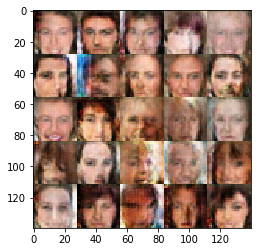

Epoch 1/2; Discriminator Loss: 1.3898; Generator Loss: 0.7699
Epoch 1/2; Discriminator Loss: 1.3504; Generator Loss: 0.7635
Epoch 1/2; Discriminator Loss: 1.3624; Generator Loss: 0.8395
Epoch 1/2; Discriminator Loss: 1.4204; Generator Loss: 0.7918
Epoch 1/2; Discriminator Loss: 1.4351; Generator Loss: 0.7558
Epoch 1/2; Discriminator Loss: 1.3974; Generator Loss: 0.7093
Epoch 1/2; Discriminator Loss: 1.3792; Generator Loss: 0.7805
Epoch 1/2; Discriminator Loss: 1.4164; Generator Loss: 0.8049
Epoch 1/2; Discriminator Loss: 1.3999; Generator Loss: 0.7639
Epoch 1/2; Discriminator Loss: 1.4256; Generator Loss: 0.7678
Epoch 1/2; Discriminator Loss: 1.3745; Generator Loss: 0.7641
Epoch 1/2; Discriminator Loss: 1.3785; Generator Loss: 0.7965
Epoch 1/2; Discriminator Loss: 1.3953; Generator Loss: 0.7965
Epoch 1/2; Discriminator Loss: 1.4431; Generator Loss: 0.7797
Epoch 1/2; Discriminator Loss: 1.4258; Generator Loss: 0.7359
Epoch 1/2; Discriminator Loss: 1.3867; Generator Loss: 0.7696
Epoch 1/

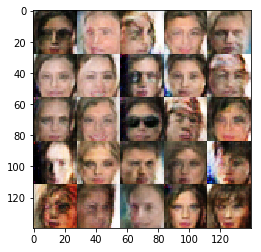

Epoch 1/2; Discriminator Loss: 1.4183; Generator Loss: 0.7446
Epoch 1/2; Discriminator Loss: 1.4183; Generator Loss: 0.7856
Epoch 1/2; Discriminator Loss: 1.3787; Generator Loss: 0.8070
Epoch 1/2; Discriminator Loss: 1.3828; Generator Loss: 0.8169
Epoch 1/2; Discriminator Loss: 1.3646; Generator Loss: 0.8233
Epoch 1/2; Discriminator Loss: 1.3689; Generator Loss: 0.7669
Epoch 1/2; Discriminator Loss: 1.3964; Generator Loss: 0.7765
Epoch 1/2; Discriminator Loss: 1.4028; Generator Loss: 0.7958
Epoch 1/2; Discriminator Loss: 1.3975; Generator Loss: 0.7806
Epoch 1/2; Discriminator Loss: 1.3730; Generator Loss: 0.8067
Epoch 1/2; Discriminator Loss: 1.3648; Generator Loss: 0.7687
Epoch 2/2; Discriminator Loss: 1.3503; Generator Loss: 0.8004
Epoch 2/2; Discriminator Loss: 1.3863; Generator Loss: 0.8087
Epoch 2/2; Discriminator Loss: 1.4209; Generator Loss: 0.7740
Epoch 2/2; Discriminator Loss: 1.3894; Generator Loss: 0.8342
Epoch 2/2; Discriminator Loss: 1.3509; Generator Loss: 0.7431


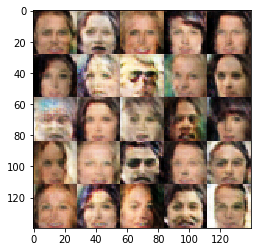

Epoch 2/2; Discriminator Loss: 1.4156; Generator Loss: 0.7496
Epoch 2/2; Discriminator Loss: 1.3591; Generator Loss: 0.8413
Epoch 2/2; Discriminator Loss: 1.4228; Generator Loss: 0.7744
Epoch 2/2; Discriminator Loss: 1.4019; Generator Loss: 0.8107
Epoch 2/2; Discriminator Loss: 1.3956; Generator Loss: 0.7765
Epoch 2/2; Discriminator Loss: 1.3532; Generator Loss: 0.8132
Epoch 2/2; Discriminator Loss: 1.4045; Generator Loss: 0.7064
Epoch 2/2; Discriminator Loss: 1.1247; Generator Loss: 0.9339
Epoch 2/2; Discriminator Loss: 1.4286; Generator Loss: 0.6357
Epoch 2/2; Discriminator Loss: 1.3735; Generator Loss: 0.6915
Epoch 2/2; Discriminator Loss: 1.4050; Generator Loss: 0.7871
Epoch 2/2; Discriminator Loss: 1.4206; Generator Loss: 0.7171
Epoch 2/2; Discriminator Loss: 1.3820; Generator Loss: 0.7830
Epoch 2/2; Discriminator Loss: 1.3306; Generator Loss: 0.7739
Epoch 2/2; Discriminator Loss: 1.3910; Generator Loss: 0.7659
Epoch 2/2; Discriminator Loss: 1.3852; Generator Loss: 0.7514
Epoch 2/

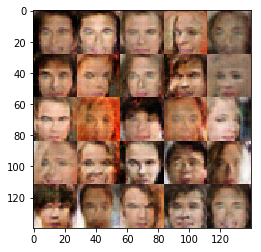

Epoch 2/2; Discriminator Loss: 1.3902; Generator Loss: 0.7670
Epoch 2/2; Discriminator Loss: 1.3750; Generator Loss: 0.7621
Epoch 2/2; Discriminator Loss: 1.4009; Generator Loss: 0.7420
Epoch 2/2; Discriminator Loss: 1.3635; Generator Loss: 0.7693
Epoch 2/2; Discriminator Loss: 1.4233; Generator Loss: 0.7877
Epoch 2/2; Discriminator Loss: 1.3827; Generator Loss: 0.8037
Epoch 2/2; Discriminator Loss: 1.3952; Generator Loss: 0.7704
Epoch 2/2; Discriminator Loss: 1.2659; Generator Loss: 0.7753
Epoch 2/2; Discriminator Loss: 1.4301; Generator Loss: 0.6942
Epoch 2/2; Discriminator Loss: 1.3700; Generator Loss: 0.7435
Epoch 2/2; Discriminator Loss: 1.4034; Generator Loss: 0.7516
Epoch 2/2; Discriminator Loss: 1.3583; Generator Loss: 0.8226
Epoch 2/2; Discriminator Loss: 1.4045; Generator Loss: 0.7565
Epoch 2/2; Discriminator Loss: 1.3692; Generator Loss: 0.8166
Epoch 2/2; Discriminator Loss: 1.3994; Generator Loss: 0.7881
Epoch 2/2; Discriminator Loss: 1.3808; Generator Loss: 0.7607
Epoch 2/

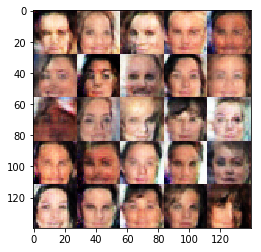

Epoch 2/2; Discriminator Loss: 1.3804; Generator Loss: 0.7446
Epoch 2/2; Discriminator Loss: 1.3915; Generator Loss: 0.8323
Epoch 2/2; Discriminator Loss: 1.4044; Generator Loss: 0.7740
Epoch 2/2; Discriminator Loss: 1.3678; Generator Loss: 0.7764
Epoch 2/2; Discriminator Loss: 1.3641; Generator Loss: 0.7630
Epoch 2/2; Discriminator Loss: 1.4137; Generator Loss: 0.7338
Epoch 2/2; Discriminator Loss: 1.4179; Generator Loss: 0.7712
Epoch 2/2; Discriminator Loss: 1.4079; Generator Loss: 0.7352
Epoch 2/2; Discriminator Loss: 1.3420; Generator Loss: 0.8080
Epoch 2/2; Discriminator Loss: 1.3837; Generator Loss: 0.8220
Epoch 2/2; Discriminator Loss: 1.4057; Generator Loss: 0.7890
Epoch 2/2; Discriminator Loss: 1.3815; Generator Loss: 0.7860
Epoch 2/2; Discriminator Loss: 1.3945; Generator Loss: 0.7706
Epoch 2/2; Discriminator Loss: 1.3836; Generator Loss: 0.8048
Epoch 2/2; Discriminator Loss: 1.3910; Generator Loss: 0.7392
Epoch 2/2; Discriminator Loss: 1.3918; Generator Loss: 0.7558


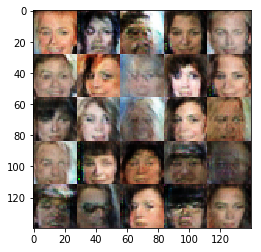

Epoch 2/2; Discriminator Loss: 1.4022; Generator Loss: 0.7794
Epoch 2/2; Discriminator Loss: 1.3714; Generator Loss: 0.7757
Epoch 2/2; Discriminator Loss: 1.3718; Generator Loss: 0.7877
Epoch 2/2; Discriminator Loss: 1.3854; Generator Loss: 0.8050
Epoch 2/2; Discriminator Loss: 1.3842; Generator Loss: 0.8200
Epoch 2/2; Discriminator Loss: 1.3771; Generator Loss: 0.8503
Epoch 2/2; Discriminator Loss: 1.3875; Generator Loss: 0.8192
Epoch 2/2; Discriminator Loss: 1.3813; Generator Loss: 0.7842
Epoch 2/2; Discriminator Loss: 1.3675; Generator Loss: 0.9316
Epoch 2/2; Discriminator Loss: 1.3933; Generator Loss: 0.7053
Epoch 2/2; Discriminator Loss: 1.3588; Generator Loss: 0.7922
Epoch 2/2; Discriminator Loss: 1.3847; Generator Loss: 0.7988
Epoch 2/2; Discriminator Loss: 1.4453; Generator Loss: 0.8083
Epoch 2/2; Discriminator Loss: 1.3919; Generator Loss: 0.8036
Epoch 2/2; Discriminator Loss: 1.3661; Generator Loss: 0.8700
Epoch 2/2; Discriminator Loss: 1.4237; Generator Loss: 0.7062
Epoch 2/

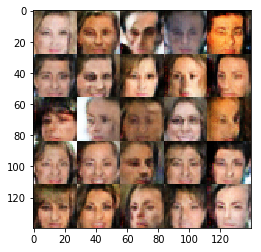

Epoch 2/2; Discriminator Loss: 1.4027; Generator Loss: 0.7778
Epoch 2/2; Discriminator Loss: 1.3931; Generator Loss: 0.7961
Epoch 2/2; Discriminator Loss: 1.3904; Generator Loss: 0.7925
Epoch 2/2; Discriminator Loss: 1.3627; Generator Loss: 0.7716
Epoch 2/2; Discriminator Loss: 1.3723; Generator Loss: 0.7419
Epoch 2/2; Discriminator Loss: 1.3784; Generator Loss: 0.7842
Epoch 2/2; Discriminator Loss: 1.3990; Generator Loss: 0.7867
Epoch 2/2; Discriminator Loss: 1.4211; Generator Loss: 0.7191
Epoch 2/2; Discriminator Loss: 1.3902; Generator Loss: 0.8032
Epoch 2/2; Discriminator Loss: 1.4304; Generator Loss: 0.8121
Epoch 2/2; Discriminator Loss: 1.4075; Generator Loss: 0.7781
Epoch 2/2; Discriminator Loss: 1.3891; Generator Loss: 0.8151
Epoch 2/2; Discriminator Loss: 1.4057; Generator Loss: 0.7744
Epoch 2/2; Discriminator Loss: 1.3679; Generator Loss: 0.7982
Epoch 2/2; Discriminator Loss: 1.4601; Generator Loss: 0.7189
Epoch 2/2; Discriminator Loss: 1.4088; Generator Loss: 0.8096
Epoch 2/

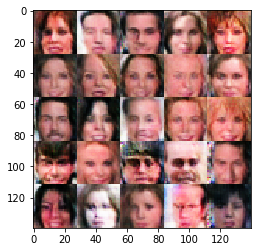

Epoch 2/2; Discriminator Loss: 1.3770; Generator Loss: 0.8054
Epoch 2/2; Discriminator Loss: 1.3656; Generator Loss: 0.7889
Epoch 2/2; Discriminator Loss: 1.3927; Generator Loss: 0.7818
Epoch 2/2; Discriminator Loss: 1.3753; Generator Loss: 0.7929
Epoch 2/2; Discriminator Loss: 1.4058; Generator Loss: 0.7422
Epoch 2/2; Discriminator Loss: 1.4081; Generator Loss: 0.7814
Epoch 2/2; Discriminator Loss: 1.3986; Generator Loss: 0.8041
Epoch 2/2; Discriminator Loss: 1.4144; Generator Loss: 0.7834
Epoch 2/2; Discriminator Loss: 1.3847; Generator Loss: 0.8099
Epoch 2/2; Discriminator Loss: 1.3739; Generator Loss: 0.8185
Epoch 2/2; Discriminator Loss: 1.3938; Generator Loss: 0.7794
Epoch 2/2; Discriminator Loss: 1.4309; Generator Loss: 0.7130
Epoch 2/2; Discriminator Loss: 1.3645; Generator Loss: 0.7917
Epoch 2/2; Discriminator Loss: 1.4124; Generator Loss: 0.7490
Epoch 2/2; Discriminator Loss: 1.3625; Generator Loss: 0.8056
Epoch 2/2; Discriminator Loss: 1.3570; Generator Loss: 0.7982


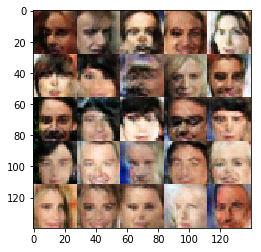

Epoch 2/2; Discriminator Loss: 1.3919; Generator Loss: 0.7768
Epoch 2/2; Discriminator Loss: 1.3980; Generator Loss: 0.7833
Epoch 2/2; Discriminator Loss: 1.3886; Generator Loss: 0.7472
Epoch 2/2; Discriminator Loss: 1.3791; Generator Loss: 0.7711
Epoch 2/2; Discriminator Loss: 1.3862; Generator Loss: 0.7917
Epoch 2/2; Discriminator Loss: 1.3435; Generator Loss: 0.7849
Epoch 2/2; Discriminator Loss: 1.3931; Generator Loss: 0.8002
Epoch 2/2; Discriminator Loss: 1.3975; Generator Loss: 0.7616
Epoch 2/2; Discriminator Loss: 1.3671; Generator Loss: 0.8075
Epoch 2/2; Discriminator Loss: 1.3842; Generator Loss: 0.7854
Epoch 2/2; Discriminator Loss: 1.3829; Generator Loss: 0.7964
Epoch 2/2; Discriminator Loss: 1.3823; Generator Loss: 0.8053
Epoch 2/2; Discriminator Loss: 1.3929; Generator Loss: 0.8255
Epoch 2/2; Discriminator Loss: 1.3659; Generator Loss: 0.8261
Epoch 2/2; Discriminator Loss: 1.4444; Generator Loss: 0.8290
Epoch 2/2; Discriminator Loss: 1.3815; Generator Loss: 0.7604
Epoch 2/

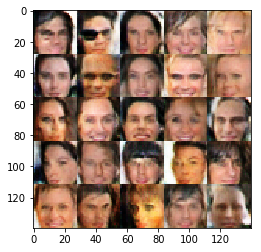

Epoch 2/2; Discriminator Loss: 1.4002; Generator Loss: 0.8082
Epoch 2/2; Discriminator Loss: 1.3968; Generator Loss: 0.7761
Epoch 2/2; Discriminator Loss: 1.4148; Generator Loss: 0.7227
Epoch 2/2; Discriminator Loss: 1.3764; Generator Loss: 0.7793
Epoch 2/2; Discriminator Loss: 1.3896; Generator Loss: 0.7335
Epoch 2/2; Discriminator Loss: 1.3801; Generator Loss: 0.7970
Epoch 2/2; Discriminator Loss: 1.3380; Generator Loss: 0.8265
Epoch 2/2; Discriminator Loss: 1.4125; Generator Loss: 0.7869
Epoch 2/2; Discriminator Loss: 1.4068; Generator Loss: 0.7837
Epoch 2/2; Discriminator Loss: 1.4125; Generator Loss: 0.7338
Epoch 2/2; Discriminator Loss: 1.3621; Generator Loss: 0.7695
Epoch 2/2; Discriminator Loss: 1.3999; Generator Loss: 0.7783
Epoch 2/2; Discriminator Loss: 1.3446; Generator Loss: 0.8191
Epoch 2/2; Discriminator Loss: 1.4136; Generator Loss: 0.7484
Epoch 2/2; Discriminator Loss: 1.3950; Generator Loss: 0.7710
Epoch 2/2; Discriminator Loss: 1.3913; Generator Loss: 0.7967
Epoch 2/

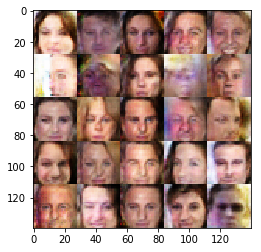

Epoch 2/2; Discriminator Loss: 1.3961; Generator Loss: 0.7878
Epoch 2/2; Discriminator Loss: 1.4261; Generator Loss: 0.7692
Epoch 2/2; Discriminator Loss: 1.3785; Generator Loss: 0.7959
Epoch 2/2; Discriminator Loss: 1.3735; Generator Loss: 0.8085
Epoch 2/2; Discriminator Loss: 1.3861; Generator Loss: 0.7924
Epoch 2/2; Discriminator Loss: 1.3874; Generator Loss: 0.7846
Epoch 2/2; Discriminator Loss: 1.3909; Generator Loss: 0.8264
Epoch 2/2; Discriminator Loss: 1.4158; Generator Loss: 0.7496
Epoch 2/2; Discriminator Loss: 1.3552; Generator Loss: 0.8243
Epoch 2/2; Discriminator Loss: 1.4207; Generator Loss: 0.7504
Epoch 2/2; Discriminator Loss: 1.4046; Generator Loss: 0.7556
Epoch 2/2; Discriminator Loss: 1.3815; Generator Loss: 0.8195
Epoch 2/2; Discriminator Loss: 1.3558; Generator Loss: 0.7937
Epoch 2/2; Discriminator Loss: 1.4176; Generator Loss: 0.7491
Epoch 2/2; Discriminator Loss: 1.4016; Generator Loss: 0.7723
Epoch 2/2; Discriminator Loss: 1.4121; Generator Loss: 0.7977


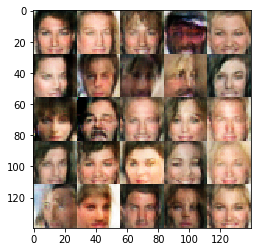

Epoch 2/2; Discriminator Loss: 1.3721; Generator Loss: 0.7796
Epoch 2/2; Discriminator Loss: 1.3364; Generator Loss: 0.7986
Epoch 2/2; Discriminator Loss: 1.4194; Generator Loss: 0.7603
Epoch 2/2; Discriminator Loss: 1.3798; Generator Loss: 0.8289
Epoch 2/2; Discriminator Loss: 1.3707; Generator Loss: 0.8250
Epoch 2/2; Discriminator Loss: 1.4162; Generator Loss: 0.7295
Epoch 2/2; Discriminator Loss: 1.3937; Generator Loss: 0.7938
Epoch 2/2; Discriminator Loss: 1.3784; Generator Loss: 0.7890
Epoch 2/2; Discriminator Loss: 1.3776; Generator Loss: 0.8151
Epoch 2/2; Discriminator Loss: 1.4301; Generator Loss: 0.7304
Epoch 2/2; Discriminator Loss: 1.3625; Generator Loss: 0.7916
Epoch 2/2; Discriminator Loss: 1.4064; Generator Loss: 0.7793
Epoch 2/2; Discriminator Loss: 1.3918; Generator Loss: 0.7830
Epoch 2/2; Discriminator Loss: 1.3883; Generator Loss: 0.7791
Epoch 2/2; Discriminator Loss: 1.3623; Generator Loss: 0.8155
Epoch 2/2; Discriminator Loss: 1.4129; Generator Loss: 0.7732
Epoch 2/

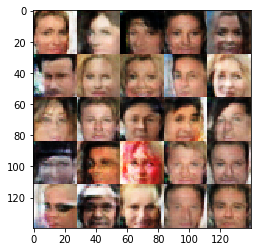

Epoch 2/2; Discriminator Loss: 1.4079; Generator Loss: 0.7388
Epoch 2/2; Discriminator Loss: 1.3887; Generator Loss: 0.7840
Epoch 2/2; Discriminator Loss: 1.3986; Generator Loss: 0.7969
Epoch 2/2; Discriminator Loss: 1.3902; Generator Loss: 0.7400
Epoch 2/2; Discriminator Loss: 1.3660; Generator Loss: 0.7420
Epoch 2/2; Discriminator Loss: 1.3448; Generator Loss: 0.7121
Epoch 2/2; Discriminator Loss: 1.4086; Generator Loss: 0.7371
Epoch 2/2; Discriminator Loss: 1.3544; Generator Loss: 0.7703
Epoch 2/2; Discriminator Loss: 1.3523; Generator Loss: 0.8750
Epoch 2/2; Discriminator Loss: 1.3684; Generator Loss: 0.8494
Epoch 2/2; Discriminator Loss: 1.4230; Generator Loss: 0.7452
Epoch 2/2; Discriminator Loss: 1.4268; Generator Loss: 0.7537
Epoch 2/2; Discriminator Loss: 1.3379; Generator Loss: 0.7787
Epoch 2/2; Discriminator Loss: 1.3958; Generator Loss: 0.7692
Epoch 2/2; Discriminator Loss: 1.3585; Generator Loss: 0.8034
Epoch 2/2; Discriminator Loss: 1.4230; Generator Loss: 0.7220
Epoch 2/

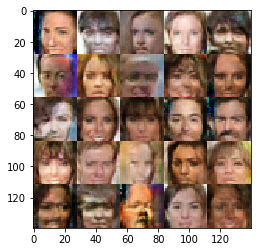

Epoch 2/2; Discriminator Loss: 1.3894; Generator Loss: 0.8339
Epoch 2/2; Discriminator Loss: 1.3576; Generator Loss: 0.7765
Epoch 2/2; Discriminator Loss: 1.3799; Generator Loss: 0.7502
Epoch 2/2; Discriminator Loss: 1.3767; Generator Loss: 0.8207
Epoch 2/2; Discriminator Loss: 1.3798; Generator Loss: 0.8048
Epoch 2/2; Discriminator Loss: 1.3833; Generator Loss: 0.7840
Epoch 2/2; Discriminator Loss: 1.4245; Generator Loss: 0.7598
Epoch 2/2; Discriminator Loss: 1.3824; Generator Loss: 0.7570
Epoch 2/2; Discriminator Loss: 1.3708; Generator Loss: 0.7958
Epoch 2/2; Discriminator Loss: 1.3518; Generator Loss: 0.7815
Epoch 2/2; Discriminator Loss: 1.4074; Generator Loss: 0.7817
Epoch 2/2; Discriminator Loss: 1.4025; Generator Loss: 0.7397
Epoch 2/2; Discriminator Loss: 1.3815; Generator Loss: 0.7965
Epoch 2/2; Discriminator Loss: 1.3970; Generator Loss: 0.7429
Epoch 2/2; Discriminator Loss: 1.3762; Generator Loss: 0.7837
Epoch 2/2; Discriminator Loss: 1.3790; Generator Loss: 0.7788


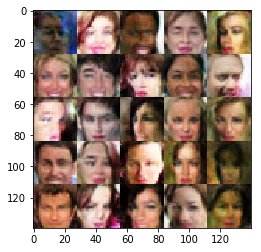

Epoch 2/2; Discriminator Loss: 1.3722; Generator Loss: 0.7558
Epoch 2/2; Discriminator Loss: 1.4038; Generator Loss: 0.7406
Epoch 2/2; Discriminator Loss: 1.4042; Generator Loss: 0.7610
Epoch 2/2; Discriminator Loss: 1.3963; Generator Loss: 0.7655
Epoch 2/2; Discriminator Loss: 1.3779; Generator Loss: 0.8005
Epoch 2/2; Discriminator Loss: 1.3727; Generator Loss: 0.7757


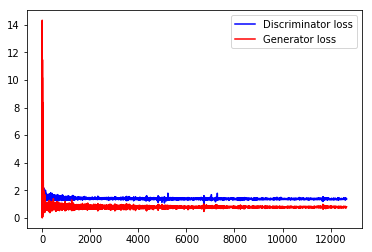

In [50]:
batch_size = 32
z_dim = 200
learning_rate = 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.